### Getting webcam images

Fragment below was used from to different devices to capture the room with calibration board from different angles.

In [157]:
# cap = cv2.VideoCapture(0) # video capture source camera (here webcam of laptop)
# num = 0

# while cap.isOpened():

#     succes, img = cap.read()
#     k = cv2.waitKey(3)

#     if k == 30:
#         break
#     elif k == ord('s'): # wait for 's' key to save and exit
#         cv2.imwrite('frames/img' + str(num) + '.png', img)
#         print("image has been saved")
#         num += 1
#     cv2.imshow('webcam', img)

# cap.release()
# cv2.destroyAllWindows()

In order to calibrate two webcams 16 frames were captured from both of them.

### Finding chessboard corners

In [151]:
import numpy as np
import cv2 as cv
import glob

chessboardSize = (10, 7) # Number of inner corners per a chessboard width and height
frameSize = (640, 480) # Resolution of images

# Termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
size_of_square = 22 #in mm

# Prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((chessboardSize[0] * chessboardSize[1], 3), np.float32)
objp[:,:2] = np.mgrid[0:chessboardSize[0], 0:chessboardSize[1]].T.reshape(-1, 2)*size_of_square

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.


images = glob.glob('frames/*.png')
counter = 0

for image in images:

    img = cv.imread(image)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) # Convert to grayscale for findChessboardCorners()

    ret, corners = cv.findChessboardCorners(gray, chessboardSize, None) # Find the corners

    if ret == True:

        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray, corners, (11,11), (-1,-1), criteria) # Refine the corners
        imgpoints.append(corners)

        cv.drawChessboardCorners(img, chessboardSize, corners2, ret)
        cv.imshow('finding corners', img)
        cv.imwrite('output/corners1/img_with_corners' + str(counter) + '.png', img)
        cv.waitKey(1000)
        counter += 1

cv.destroyAllWindows()


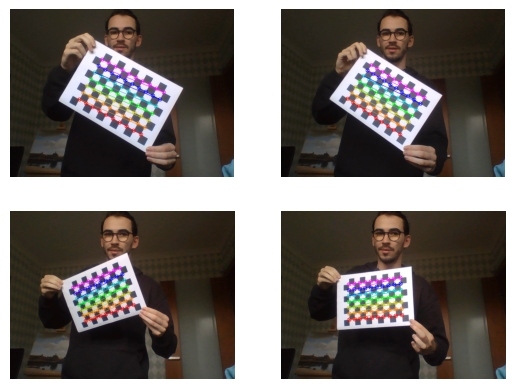

In [152]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the path to the directory
directory = 'output/corners1/'

# Plot the first four images
for i in range(4):
    img_path = directory + 'img_with_corners' + str(i) + '.png'
    img = mpimg.imread(img_path)
    plt.subplot(2, 2, i+1)
    plt.imshow(img)
    plt.axis('off')

plt.show()


Same for the second webcam with more saturated frames

In [153]:
# Prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp2 = np.zeros((chessboardSize[0] * chessboardSize[1], 3), np.float32)
objp2[:,:2] = np.mgrid[0:chessboardSize[0], 0:chessboardSize[1]].T.reshape(-1, 2)*size_of_square

# Arrays to store object points and image points from all the images.
objpoints2 = [] # 3d point in real world space
imgpoints2 = [] # 2d points in image plane.


images2 = glob.glob('frames2/*.png')
counter = 0

for image in images2:

    img = cv.imread(image)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) # Convert to grayscale for findChessboardCorners()

    ret, corners = cv.findChessboardCorners(gray, chessboardSize, None) # Find the corners

    if ret == True:

        objpoints2.append(objp2)
        corners2 = cv.cornerSubPix(gray, corners, (11,11), (-1,-1), criteria) # Refine the corners
        imgpoints2.append(corners)

        cv.drawChessboardCorners(img, chessboardSize, corners2, ret)
        cv.imshow('finding corners', img)
        cv.imwrite('output/corners2/img_with_corners' + str(counter) + '.png', img)
        cv.waitKey(1000)
        counter += 1

cv.destroyAllWindows()


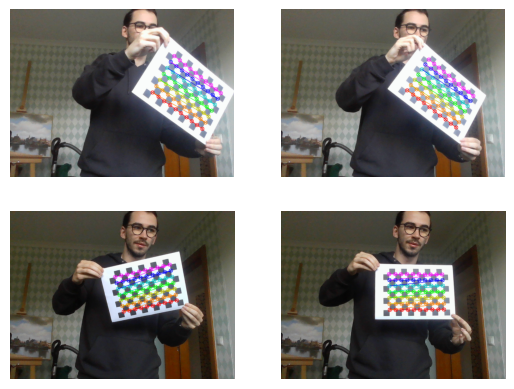

In [154]:
directory = 'output/corners2/'

for i in range(4):
    img_path = directory + 'img_with_corners' + str(i) + '.png'
    img = mpimg.imread(img_path)
    plt.subplot(2, 2, i+1)
    plt.imshow(img)
    plt.axis('off')

plt.show()

### Calibrate left webcam

In [155]:
import pickle

ret, mtrx1, dist1, rvecs1, tvecs1 = cv.calibrateCamera(objpoints, imgpoints, frameSize, None, None)

print("RMSE: \n")
print(ret)
print("Camera matrix: \n")
print(mtrx1)
print("Distortion coefficients: \n")
print(dist1)
print("Rotation vectors: \n")
print(rvecs1)
print("Translation vectors: \n")
print(tvecs1)

pickle.dump((mtrx1, dist1, rvecs1, tvecs1), open("output\camera_calibration_1\calibration_webcam1.pkl", "wb"))

RMSE: 

0.38402617520561144
Camera matrix: 

[[725.87335538   0.         361.03262325]
 [  0.         721.68758131 205.87722661]
 [  0.           0.           1.        ]]
Distortion coefficients: 

[[ 4.75879512e-02 -1.36816970e+00 -5.43618775e-03  2.84747987e-02
   1.89495842e+01]]
Rotation vectors: 

(array([[-0.06789074],
       [-0.20062574],
       [-2.63195082]]), array([[-0.17779293],
       [-0.3694203 ],
       [-2.54241216]]), array([[ 0.45358479],
       [-0.04232867],
       [ 2.75023081]]), array([[0.36682319],
       [0.37976713],
       [3.00451781]]), array([[-0.26460332],
       [-0.48002515],
       [-2.91041392]]), array([[ 0.1184659 ],
       [-0.16124748],
       [ 2.86176276]]), array([[-0.03945826],
       [-0.20396211],
       [ 2.82774707]]), array([[-0.27466405],
       [-0.19004663],
       [ 2.64940669]]), array([[ 0.01048753],
       [ 0.12933193],
       [-2.78682672]]), array([[-0.05118298],
       [ 0.35016951],
       [-2.89139885]]), array([[-0.064879

### Calibrate right webcam

In [156]:
ret, mtrx2, dist2, rvecs2, tvecs2 = cv.calibrateCamera(objpoints2, imgpoints2, frameSize, None, None)

print("RMSE: \n")
print(ret)
print("Camera matrix: \n")
print(mtrx2)
print("Distortion coefficients: \n")
print(dist2)
print("Rotation vectors: \n")
print(rvecs2)
print("Translation vectors: \n")
print(tvecs2)

pickle.dump((mtrx2, dist2, rvecs2, tvecs2), open("output\camera_calibration_2\calibration_webcam2.pkl", "wb"))

RMSE: 

0.6347041326207266
Camera matrix: 

[[498.13859304   0.         302.3440357 ]
 [  0.         502.73489872 275.41247954]
 [  0.           0.           1.        ]]
Distortion coefficients: 

[[-0.33487651  1.31056264  0.0187361   0.01401203 -1.70389343]]
Rotation vectors: 

(array([[ 0.34720145],
       [-0.07243804],
       [-2.55768991]]), array([[ 0.24733048],
       [-0.2275996 ],
       [-2.50245535]]), array([[ 0.14979713],
       [-0.29577257],
       [ 2.89273206]]), array([[-0.01542534],
       [ 0.10062296],
       [ 3.12766378]]), array([[ 0.12645455],
       [-0.25433737],
       [-2.8887791 ]]), array([[-0.16802342],
       [-0.4637894 ],
       [ 2.93737824]]), array([[-0.28918885],
       [-0.51351385],
       [ 2.87793665]]), array([[-0.50293035],
       [-0.48472709],
       [ 2.66713148]]), array([[ 0.3196656 ],
       [ 0.29566485],
       [-2.66235722]]), array([[ 0.26302922],
       [ 0.51022382],
       [-2.7392697 ]]), array([[ 0.2939914 ],
       [ 0.1829

### RMSE of the webcam calibration by hand

Left one

In [7]:
mean_error = 0
for i in range(len(objpoints)):
    imgpoints_temp, _ = cv.projectPoints(objpoints[i], rvecs1[i], tvecs1[i], mtrx1, dist1)
    error = cv.norm(imgpoints[i], imgpoints_temp, cv.NORM_L2)/len(imgpoints_temp)
    mean_error += error
print( "total error: {}".format(mean_error/len(objpoints)))

total error: 0.03811541544192146


Right one

In [8]:
mean_error2 = 0
for i in range(len(objpoints2)):
    imgpoints_temp, _ = cv.projectPoints(objpoints2[i], rvecs2[i], tvecs2[i], mtrx2, dist2)
    error2 = cv.norm(imgpoints2[i], imgpoints_temp, cv.NORM_L2)/len(imgpoints_temp)
    mean_error2 += error2
print( "total error: {}".format(mean_error2/len(objpoints2)))

total error: 0.0688883618569687


## Stereo Calibration

Files are synchronized, thus *objpoints* = *objpoints2*.

In [9]:
stereocalibration_flags = cv.CALIB_FIX_INTRINSIC
ret, CM1, distS1, CM2, distS2, R, T, E, F = cv.stereoCalibrate(objpoints, imgpoints, imgpoints2, mtrx1, dist1,
mtrx2, dist2, (640, 480), criteria = criteria, flags = stereocalibration_flags)

In [11]:
print("RMSE: \n")
print(ret)
print("Camera matrix 1: \n")
print(CM1)
print("Distortion coefficients 1: \n")
print(distS1)
print("Camera matrix 2: \n")
print(CM2)
print("Distortion coefficients 2: \n")
print(distS2)
print("Rotation matrix: \n")
print(R)
print("Translation vector: \n")
print(T)
print("Essential matrix: \n")
print(E)
print("Fundamental matrix: \n")
print(F)

pickle.dump((CM1, dist1, CM2, dist2, R, T, E, F), open("output\stereo_calibration\stereo_calibration.pkl", "wb"))

RMSE: 

0.9075106320201937
Camera matrix 1: 

[[725.87335538   0.         361.03262325]
 [  0.         721.68758131 205.87722661]
 [  0.           0.           1.        ]]
Distortion coefficients 1: 

[[ 4.75879512e-02 -1.36816970e+00 -5.43618775e-03  2.84747987e-02
   1.89495842e+01]]
Camera matrix 2: 

[[498.13858728   0.         302.3440332 ]
 [  0.         502.73489227 275.41247621]
 [  0.           0.           1.        ]]
Distortion coefficients 2: 

[[-0.33487648  1.31056247  0.0187361   0.01401202 -1.70389312]]
Rotation matrix: 

[[ 0.96772805 -0.10299578 -0.22998758]
 [ 0.06096335  0.98123742 -0.18291146]
 [ 0.24451153  0.16298774  0.95584994]]
Translation vector: 

[[19.53459202]
 [ 2.46931625]
 [-7.93343562]]
Essential matrix: 

[[  1.08742513   8.18705214   0.90917949]
 [-12.4538412   -2.36678858 -16.84754693]
 [ -1.19873238  19.42240176  -3.00518869]]
Fundamental matrix: 

[[-2.33249580e-06 -1.76628460e-05  3.06291274e-03]
 [ 2.64689055e-05  5.05945512e-06  1.53936660e-0

## Pose estimation

In [24]:
import numpy as np
import cv2 as cv
import glob

# Load previously saved data
mtx, dist, _, _ = np.load('output/camera_calibration_1/calibration_webcam1.pkl', allow_pickle=True)

In [25]:
def draw(img, corners, imgpts):
    corner = tuple(corners[0].ravel())
    img = cv.line(img, corner, tuple(imgpts[0].ravel()), (255,0,0), 5)
    img = cv.line(img, corner, tuple(imgpts[1].ravel()), (0,255,0), 5)
    img = cv.line(img, corner, tuple(imgpts[2].ravel()), (0,0,255), 5)
    return img

In [26]:
chessboardSize = (10, 7)

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

objp = np.zeros((chessboardSize[0] * chessboardSize[1], 3), np.float32)
objp[:,:2] = np.mgrid[0:chessboardSize[0], 0:chessboardSize[1]].T.reshape(-1, 2)

axis = np.float32([[3,0,0], [0,3,0], [0,0,-3]]).reshape(-1,3)
counter = 0

for fname in glob.glob('frames/*.png'):
    img = cv.imread(fname)
    gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    ret, corners = cv.findChessboardCorners(gray, chessboardSize, None)
    if ret == True:
        corners2 = cv.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        # Find the rotation and translation vectors.
        ret, rvecs, tvecs = cv.solvePnP(objp, corners2, mtx, dist)
        # project 3D points to image plane
        imgpts, jac = cv.projectPoints(axis, rvecs, tvecs, mtx, dist)
        # convert to integers
        imgpts = imgpts.astype(int)
        corners2 = corners2.astype(int)
        img = draw(img,corners2,imgpts)
        cv.imshow('img',img)
        k = cv.waitKey(0) & 0xFF
        if k == ord('s'):
            cv.imwrite('output/poses/pose' + str(counter) + '.png', img)
            counter += 1
cv.destroyAllWindows()

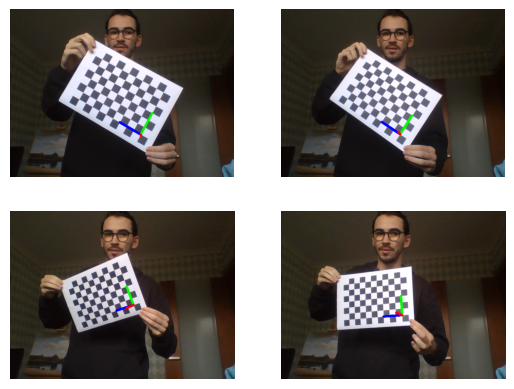

In [27]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the paths to the images
image1_path = 'output/poses/pose0.png'
image2_path = 'output/poses/pose1.png'
image3_path = 'output/poses/pose2.png'
image4_path = 'output/poses/pose3.png'

# Read the images
image1 = mpimg.imread(image1_path)
image2 = mpimg.imread(image2_path)
image3 = mpimg.imread(image3_path)
image4 = mpimg.imread(image4_path)

# Create a figure with four subplots
fig, axes = plt.subplots(2, 2)

# Plot the first image
axes[0, 0].imshow(image1)
axes[0, 0].axis('off')

# Plot the second image
axes[0, 1].imshow(image2)
axes[0, 1].axis('off')

# Plot the third image
axes[1, 0].imshow(image3)
axes[1, 0].axis('off')

# Plot the fourth image
axes[1, 1].imshow(image4)
axes[1, 1].axis('off')

# Display the figure
plt.show()


In [28]:
def draw_cube(img, corners, imgpts):
    imgpts = np.int32(imgpts).reshape(-1,2)
    # draw ground floor in green
    img = cv.drawContours(img, [imgpts[:4]],-1,(0,255,0),-3)
    # draw pillars in blue color
    for i,j in zip(range(4),range(4,8)):
        img = cv.line(img, tuple(imgpts[i]), tuple(imgpts[j]),(255),3)
    # draw top layer in red color
    img = cv.drawContours(img, [imgpts[4:]],-1,(0,0,255),3)
    return img

In [29]:
chessboardSize = (10, 7)

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

objp = np.zeros((chessboardSize[0] * chessboardSize[1], 3), np.float32)
objp[:,:2] = np.mgrid[0:chessboardSize[0], 0:chessboardSize[1]].T.reshape(-1, 2)

axis = np.float32([[0,0,0], [0,3,0], [3,3,0], [3,0,0],
                   [0,0,-3],[0,3,-3],[3,3,-3],[3,0,-3]])
counter = 0

for fname in glob.glob('frames/*.png'):
    img = cv.imread(fname)
    gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    ret, corners = cv.findChessboardCorners(gray, chessboardSize, None)
    if ret == True:
        corners2 = cv.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        # Find the rotation and translation vectors.
        ret, rvecs, tvecs = cv.solvePnP(objp, corners2, mtx, dist)
        # project 3D points to image plane
        imgpts, jac = cv.projectPoints(axis, rvecs, tvecs, mtx, dist)
        # convert to integers
        imgpts = imgpts.astype(int)
        corners2 = corners2.astype(int)
        img = draw_cube(img,corners2,imgpts)
        cv.imshow('img',img)
        k = cv.waitKey(0) & 0xFF
        if k == ord('s'):
            cv.imwrite('output/poses_cubes/pose_cube' + str(counter) + '.png', img)
            counter += 1
cv.destroyAllWindows()

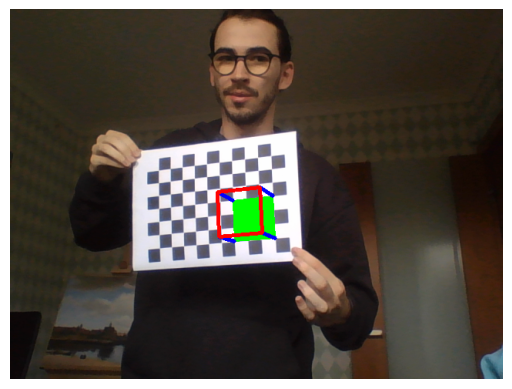

In [43]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the path to the image
image_path = 'output/poses_cubes/pose_cube3.png'

# Read the image
image = mpimg.imread(image_path)

# Plot the image
plt.imshow(image)
plt.axis('off')
plt.show()

### Triangulation

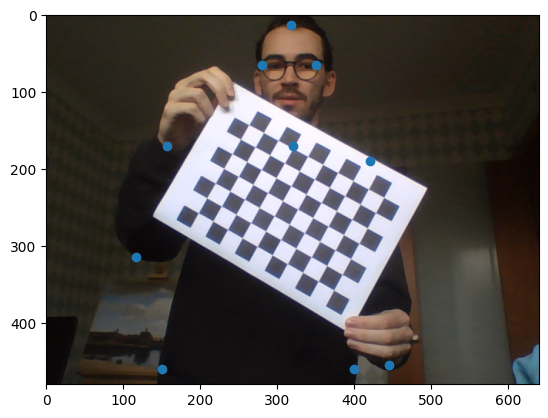

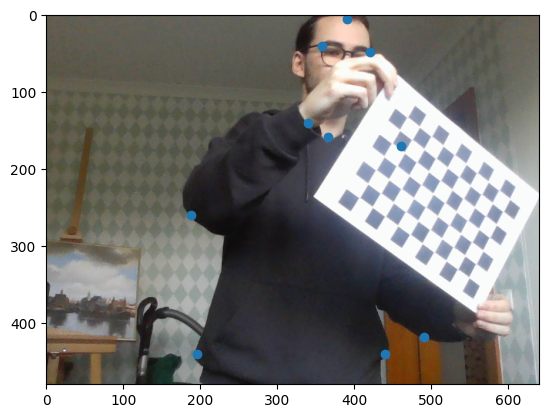

In [129]:
uvs1 = [[317, 13], [280, 65], [350, 65],
        [445, 455], [420, 190], [116, 314],
        [156, 170], [400, 460], [150, 460],
        [320, 170]]
 
uvs2 = [[390, 5], [358, 40], [420, 48],
        [490, 418], [460, 170], [188, 260],
        [340, 140], [440, 440], [195, 440],
        [366, 158]]
 
uvs1 = np.array(uvs1)
uvs2 = np.array(uvs2)

frame1 = cv.imread('frames/img0.png')
frame2 = cv.imread('frames2/img0.png')
 
plt.imshow(frame1[:,:,[2,1,0]])
plt.scatter(uvs1[:,0], uvs1[:,1])
plt.show()
 
plt.imshow(frame2[:,:,[2,1,0]])
plt.scatter(uvs2[:,0], uvs2[:,1])
plt.show()

In [130]:
#RT matrix for C1 is identity.
RT1 = np.concatenate([np.eye(3), [[0],[0],[0]]], axis = -1)
P1 = mtrx1 @ RT1 #projection matrix for C1
 
#RT matrix for C2 is the R and T obtained from stereo calibration.
RT2 = np.concatenate([R, T], axis = -1)
P2 = mtrx2 @ RT2 #projection matrix for C2

In [131]:
def DLT(P1, P2, point1, point2):
 
    A = [point1[1]*P1[2,:] - P1[1,:],
         P1[0,:] - point1[0]*P1[2,:],
         point2[1]*P2[2,:] - P2[1,:],
         P2[0,:] - point2[0]*P2[2,:]
        ]
    A = np.array(A).reshape((4,4))
    #print('A: ')
    #print(A)
 
    B = A.transpose() @ A
    from scipy import linalg
    U, s, Vh = linalg.svd(B, full_matrices = False)
 
    print('Triangulated point: ')
    print(Vh[3,0:3]/Vh[3,3])
    return Vh[3,0:3]/Vh[3,3]


In [132]:
p3ds = []
for uv1, uv2 in zip(uvs1, uvs2):
    _p3d = DLT(P1, P2, uv1, uv2)
    p3ds.append(_p3d)
p3ds = np.array(p3ds)


Triangulated point: 
[ -3.02226264 -13.31939455  49.96572099]
Triangulated point: 
[-5.48683008 -9.72290041 48.7381584 ]
Triangulated point: 
[-0.79289097 -9.71846315 48.34342422]
Triangulated point: 
[ 4.6940346  14.36702688 40.95879849]
Triangulated point: 
[ 3.90520074 -1.39761891 48.38167057]
Triangulated point: 
[-16.41710655   7.02584391  48.67669916]
Triangulated point: 
[-10.06786075  -1.73844407  35.65590263]
Triangulated point: 
[ 2.11523035 15.6456397  42.41989577]
Triangulated point: 
[-14.53127088  18.17101963  48.88919509]
Triangulated point: 
[-2.90316008 -2.47424864 51.48827195]


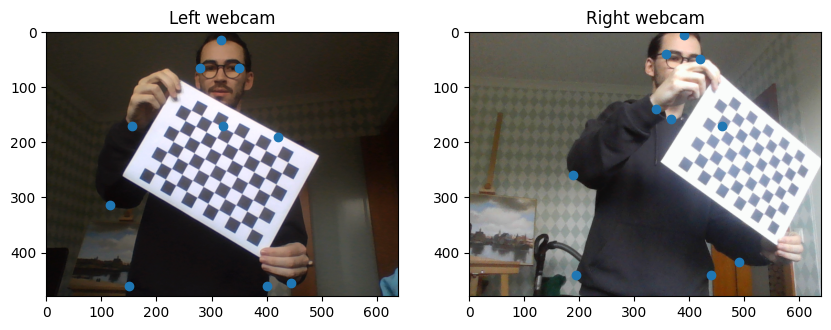

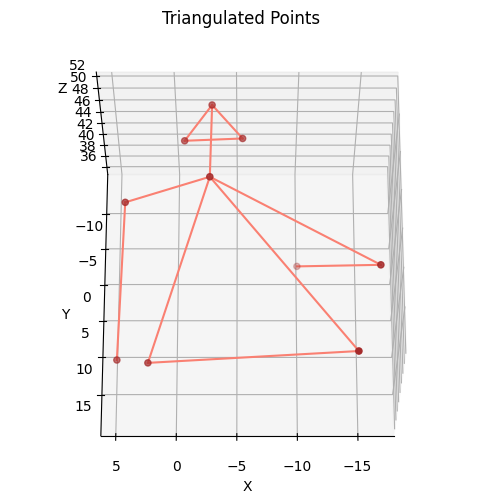

In [160]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first image
axes[0].imshow(frame1[:,:,[2,1,0]])
axes[0].scatter(uvs1[:,0], uvs1[:,1])
axes[0].set_title('Left webcam')

# Plot the second image
axes[1].imshow(frame2[:,:,[2,1,0]])
axes[1].scatter(uvs2[:,0], uvs2[:,1])
axes[1].set_title('Right webcam')

# Display the triangulated points
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': '3d'})
# Extract the x, y, and z coordinates of the triangulated points
x = p3ds[:, 0]
y = p3ds[:, 1]
z = p3ds[:, 2]

# Plot the points
ax.scatter(x, y, z, c='brown', marker='o')

# Draw connections between the points
connections = [[0,1], [1,2], [0, 2], [3, 4], [5, 6], [7, 8], [9, 4], [9, 5], [9, 7], [9, 8], [9, 0]]
for _c in connections:
    ax.plot(xs = [p3ds[_c[0],0], p3ds[_c[1],0]], ys = [p3ds[_c[0],1], p3ds[_c[1],1]], zs = [p3ds[_c[0],2], p3ds[_c[1],2]], c = 'salmon')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Triangulated Points')

# Rotate the axis
ax.view_init(elev=65, azim=90)  # Set the elevation and azimuth angles



### Credits:
https://docs.opencv.org/3.4/d6/d00/tutorial_py_root.html\
https://temugeb.github.io/opencv/python/2021/02/02/stereo-camera-calibration-and-triangulation.html